<a href="https://colab.research.google.com/github/cetinus-gulin/ie423/blob/main/task1-2/task2-gulin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
dfValues = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/tips/final_data.csv')
dfValues.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/data/tips/final_data.csv'

In [2]:
dfValues.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

Select a prediction target

In [3]:
y = dfValues.loc[:,['current_value']]

Choose features

In [4]:
X = dfValues.loc[:,['highest_value','age', 'goals', 'assists']]

In [5]:
# View top few rows
X.head()

,highest_value,age,goals,assists
0,70000000,32.0,0.000000,0.000000
1,22000000,30.0,0.000000,0.000000
2,6000000,37.0,0.000000,0.000000
3,50000000,25.0,0.028090,0.056180
4,80000000,30.0,0.017889,0.017889


In [6]:
# Describe columns using basic stats
X.describe()

,highest_value,age,goals,assists
count,1.075400e+04,10754.000000,10754.000000,10754.000000
mean,6.152606e+06,26.041903,0.125554,0.086978
std,1.338988e+07,4.777629,0.235585,0.143351
min,0.000000e+00,15.000000,0.000000,0.000000
25%,4.500000e+05,22.000000,0.000000,0.000000
50%,1.500000e+06,26.000000,0.045969,0.040773
75%,5.000000e+06,29.000000,0.172263,0.133136
max,2.000000e+08,43.000000,11.250000,4.000000


Build a model

Decision Tree

In [7]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Fix the seed to the random number generator to ensure same results each run.
mdlDtrValue = DecisionTreeRegressor(random_state=1)
mdlDtrValue.fit(X,y)

DecisionTreeRegressor(random_state=1)

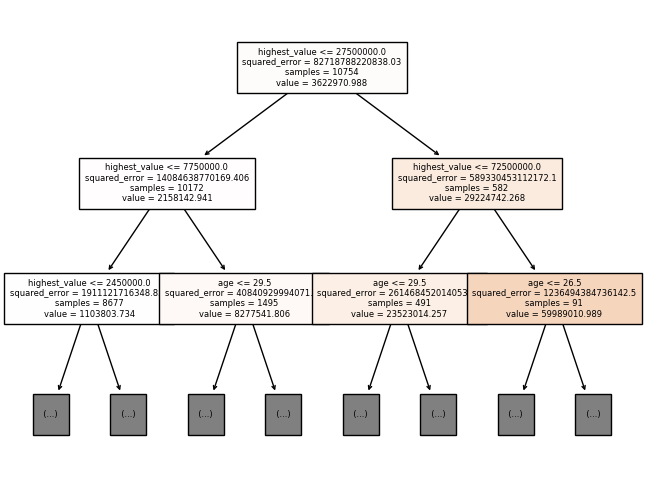

In [8]:
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrValue, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

Predict

In [9]:
print('First few players:')
print(X.head())
print('Current value predictions:')
print(mdlDtrValue.predict(X.head()))

First few players:
   highest_value   age     goals   assists
0       70000000  32.0  0.000000  0.000000
1       22000000  30.0  0.000000  0.000000
2        6000000  37.0  0.000000  0.000000
3       50000000  25.0  0.028090  0.056180
4       80000000  30.0  0.017889  0.017889
Current value predictions:
[15000000.          1500000.           383333.33333333 50000000.
 40000000.        ]


In [10]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


Evaluate

In [11]:
from sklearn.metrics import mean_absolute_error

y_pred = mdlDtrValue.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
68373.15126725493


In [12]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [13]:
# Rebuild model
mdlDtrValueSpl = DecisionTreeRegressor(random_state=1)
mdlDtrValueSpl.fit(X_train, y_train)

# Predict test data
y_test_pred = mdlDtrValueSpl.predict(X_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
1635421.3440862792


MAE increased - improve model

In [14]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrValueDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrValueDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrValueDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [15]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  2478649.7854967955
Max leaf nodes:  50 	 Mean Absolute Error:  1480731.6866488664
Max leaf nodes:  500 	 Mean Absolute Error:  1526258.0872922938
Max leaf nodes:  50000 	 Mean Absolute Error:  1577512.2320453678


Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsMlb = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsMlb.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsMlb.predict(X_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE (Random Forest):
1261506.5796304762


Takeways
- For this dataset, random forest model performs better when compared against decision tree model with respect to fine tuning.
- The best depth of the tree is at 50 max leaf nodes.
